# Linear Regression Calculated Manually


In a previous notebook I demonstrated how to fit a simple linear regression model using the statsmodels and pingouin software libraries. To develop intuition for linear regression, in this notebook I will run a regression analysis to obtain the regression coefficients by coding the equations manually.

Linear regression, where we have one scale independent variable (IV) and one scale dependent variable (DV), is calculated using the least squares method. This means that the regression line is positioned in the place where it minimises the squared distances between the line (representing the predicted DV values) and the actual datapoints. All data is inherently noisy and there will be variability between individuals in their scores on both the IV and DV. We can see this most clearly when we plot the data using a scatterplot. The purpose of the regression line is to provide a useful model that captures the general pattern, or trend, in our dataset. As such, the line is situated so that the distance between it and every datapoint in our dataset is as small as it can be. When we have a simple linear regression model with one IV and one DV there is an analytic solution (an equation) that can be used to calculate the slope of the line. When we have more IVs in our model (multiple regression), then we may need to use computational methods to repeatedly fit lines and work out which line has the smallest squared deviation from the datapoints, and is our best model for the data.

In the following cells, I will simulate some data that follows a normal distribution and has a linear relationship, and then show how to fit a simple linear regression model using equations for the slope and intercept.

In [1]:
# Importing key software libraries. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generating some random data. I am setting a random seed at 0 so the data can be replicated. 
# x is our IV. I am generating a vector of 100 values (datapoints) with mean = 1.5 and standard deviation = 2.5. 
# res is an object containing values of the residuals (the deviation of each datapoint from the regression line).
# y is our DV. The actual scores on the DV. 


np.random.seed(0)

x = 2.5 * np.random.randn(100) + 1.5
res = 0.5 * np.random.rand(100)
y = 2 + 0.3 * x + res

In [3]:
# Next, I will create a pandas dataframe to store the variables x (IV) and y (DV).
# As shown below this creates a dataframe showing the data randomly generated. The data values are floating point (decimals).
df = pd.DataFrame({'x': x, 'y': y})

df.head()

,x,y
0,5.910131,3.984967
1,2.500393,3.053315
2,3.946845,3.193650
3,7.102233,4.281457
4,6.168895,4.180755


Now that we have a dataset to analyse, I will calculate the various statistics we will need to fit the regression line. Linear regression fits the line using the equation for a straight line: y = mx + b. ( y = DV score, m = slope of the line, x = IV score, b = intercept (the point the line crosses the y-axis when x = 0)).

The above equation is written in slope-intercept form. When used for least squares regression it is often re-written to be:  
$ y = {\alpha} + {\beta}x $
 . In this form the terms are simply rearranged and different letters are used for the slope and intercept. (y = DV score, ${\beta}$ = slope of the line, x = IV score, ${\alpha}$ = intercept. To fit a linear model for our data, using this equation we will need to calcualte means scores for our variables as well as alpha and beta using all data in our vector of scores for each variable.

In [4]:
# Calculating the mean for our IV (x) and DV (y).

x_mean = np.mean(x)
y_mean = np.mean(y)

In [5]:
# Our IV has a mean of 1.65. This is close to the mean specified when generating the data (Mean = 1.5).
x_mean

1.6495200388362121

In [6]:
# The mean for the DV is 2.74. 
y_mean

2.7421879204228894

In [7]:
# There are a couple of terms we need for the numerator and denominator when calculating the the slope of the line. 
# These are the variance for the IV and the covariance of the IV and DV. 
# I will creates these as new variables that will be appended to our existing dataframe. 

# The covariance of x and y.
df['xycov'] = (df['x'] - x_mean) * (df['y'] - y_mean)

# Variance for x. 
df['xvar'] = (df['x'] - x_mean)**2

In [8]:
# Calculate 𝛼 (alpha) and 𝛽 (beta).

beta = df['xycov'].sum() / df['xvar'].sum() 

alpha = y_mean - (beta * x_mean)

Note above that the slope of the line is calculated using the covariance (of x and y) and the variance (of x). The covariance is divided by the variance.

beta = cov(x, y) / var(x). 

Also, note that the intercept is caculated by subtracting the slope multiplied by the mean IV score from the mean DV score. 

alpha = DV mean - (beta * IV mean)

In [9]:
# Printing the values of alpha (the intercept) and beta (the slope) for a regression line for our data. 

print(f"Alpha = {alpha}")

print(f"Beta = {beta}")


Alpha = 2.249334402212435
Beta = 0.2987860144810232


Now that we have the values of alpha (the intercept) and beta (the slope of the line) we can make predictions for any given input value on the IV. 

The regression equation for our model is: 

y = 2.25 + 0.30x

or

DV score = 2.25 + 0.30 * IV score

We can obtain a vector of predicted DV scores for each value of our IV as shown below.

In [10]:
# Calculated the predicted y-value (DV score) for each value in our vector of IV scores (x)
# The output returns an array of 100 predicted values. 
pred_y = alpha + beta * x

pred_y

array([4.01519885, 2.99641687, 3.42859648, 4.37138229, 4.09251395,
       1.96752102, 3.40719625, 2.58445488, 2.62041255, 3.00421615,
       2.80510894, 3.78380489, 3.265982  , 2.78840041, 3.02906374,
       2.94675648, 3.81353825, 2.54426737, 2.93136405, 2.05953377,
       0.79051929, 3.18574366, 3.34321704, 2.1431421 , 4.39294077,
       1.61115312, 2.73169344, 2.55769363, 3.84244591, 3.79507305,
       2.81325373, 2.9799876 , 2.03436851, 1.21792772, 2.43763521,
       2.81430064, 3.61649755, 3.59564913, 2.40819383, 2.47170384,
       1.91428102, 1.63680967, 1.42298925, 4.15467444, 2.31682106,
       2.37028724, 1.76171909, 3.27827154, 1.49198816, 2.53860387,
       2.02863121, 2.98651606, 2.31595985, 1.81562246, 2.67646228,
       3.01746236, 2.74719946, 2.92344936, 2.223697  , 2.42655846,
       2.19520898, 2.42893978, 2.09012158, 1.40804068, 2.83004455,
       2.39739711, 1.47981226, 3.04319559, 2.01979327, 2.73631482,
       3.24211858, 2.79385915, 3.5486059 , 1.77514171, 2.99804

It is useful to visualise the data and the regression line (showing the predicted DV scores). A scatter plot will help us to better understand the relationship between our data and the fitted regression line. 

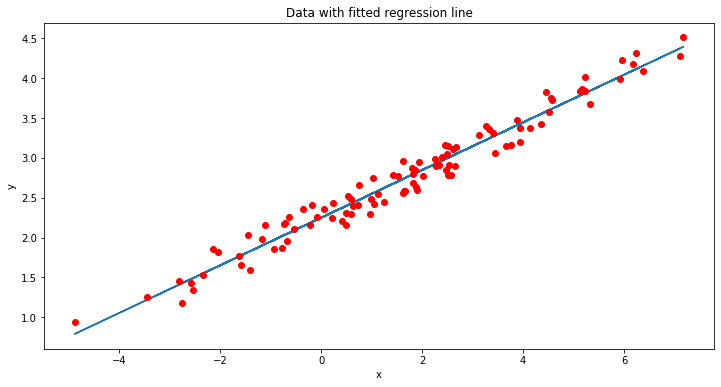

In [11]:
# Plot regression against actual data

plt.figure(figsize=(12, 6))
plt.plot(x, pred_y)    # Plots the regression line
plt.plot(x, y, 'ro')   # Scatter plot of the actual datapoints. 
plt.title('Data with fitted regression line')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Above, we can see that the simulated data is highly positively correlated and the regression line is a good model to capture the pattern in the data. It is clear that as scores on the IV (x) increase, scores on the DV (y) increase. 

## Summary:

- We can calculate the coefficients for a simple linear regression model using analytic solution formulas. 
- These help us calculate the intercept and slope for the least squares regression line that minimises the squared distances between actual and predicted scores on the DV. 
- We can use this information to predict scores on the DV for IV values that are not in our dataset. 
- Plotting the data and regression line gives us a visual impression of how well our linear model fits the data. 